In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D,MaxPool2D,Dropout,Dense,Flatten,Activation,BatchNormalization
from keras.models import Sequential
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy

Using TensorFlow backend.


In [2]:
from keras.backend import tensorflow_backend
tensorflow_backend._get_available_gpus()

['/job:localhost/replica:0/task:0/device:GPU:0']

# Data Acquisition

In [3]:
train=pd.read_csv(r'../input/train.csv')
test=pd.read_csv(r'../input/test.csv')

In [4]:
data=train.iloc[:,1:].values
data=data.reshape(-1,28,28,1)/255

In [5]:
labels=pd.get_dummies(train.iloc[:,0]).values

# Data Visualization:

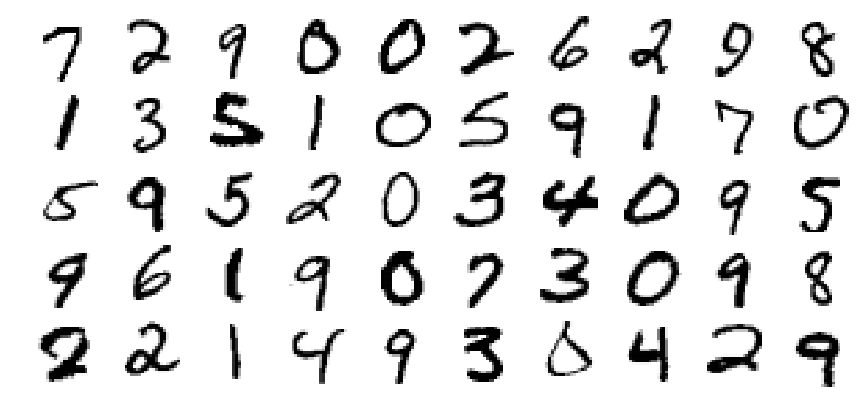

In [6]:
fig,ax=plt.subplots(5,10)
for i in range(5):
    for j in range(10):
        ax[i][j].imshow(data[np.random.randint(0,data.shape[0]),:,:,0],cmap=plt.cm.binary)
        ax[i][j].axis('off')
plt.subplots_adjust(wspace=0, hspace=0)        
fig.set_figwidth(15)
fig.set_figheight(7)
fig.show()

# Data Augmentation:

In [7]:
aug_data=ImageDataGenerator(
        rotation_range=10,  
        zoom_range = 0.10,  
        width_shift_range=0.1, 
        height_shift_range=0.1)

## Example:

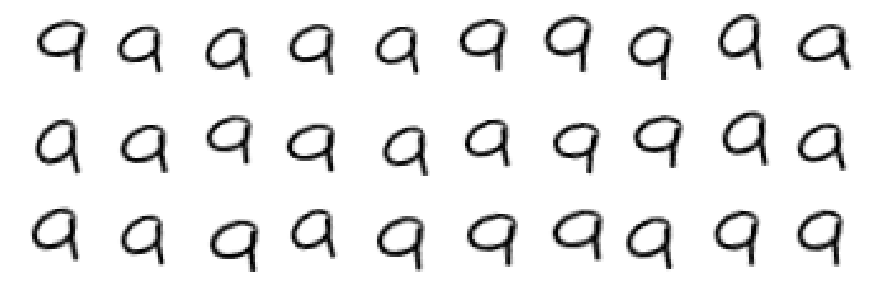

In [8]:
fig,ax=plt.subplots(3,10)
idx=np.random.randint(0,data.shape[0])
for i in range(3):
    for j in range(10):
        ax[i][j].axis('off')
        X,y=aug_data.flow(data[idx].reshape(-1,28,28,1),labels[idx].reshape(1,10)).next()
        ax[i][j].imshow(X.reshape(28,28),cmap=plt.cm.binary)
fig.set_figheight(5)
fig.set_figwidth(15)
fig.show()

In [9]:
generator=aug_data.flow(data,labels,batch_size=64)

# Model Creation

In [10]:
model=Sequential()

model.add(Conv2D(32,(3,3),input_shape=(28,28,1),activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32,(5,5),strides=(2,2),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64,(5,5),strides=(2,2),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(128,(4,4),activation='relu'))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(128,activation='relu'))

model.add(Dropout(0.4))
model.add(Dense(10,activation='softmax'))

# Compiling the model

In [11]:
model.compile(optimizer='adam',loss=categorical_crossentropy,metrics=['accuracy'])

# Fitting model on Training data

In [12]:
history=model.fit_generator(generator,epochs=50,steps_per_epoch=data.shape[0]//64)

Epoch 1/50
656/656 [==============================] - 20s 30ms/step - loss: 0.4525 - acc: 0.8554
Epoch 2/50
656/656 [==============================] - 16s 25ms/step - loss: 0.1304 - acc: 0.9617
Epoch 3/50
656/656 [==============================] - 16s 25ms/step - loss: 0.1029 - acc: 0.9695
Epoch 4/50
656/656 [==============================] - 16s 25ms/step - loss: 0.0854 - acc: 0.9756
Epoch 5/50
656/656 [==============================] - 16s 25ms/step - loss: 0.0737 - acc: 0.9782
Epoch 6/50
656/656 [==============================] - 16s 25ms/step - loss: 0.0655 - acc: 0.9811
Epoch 7/50
656/656 [==============================] - 16s 25ms/step - loss: 0.0632 - acc: 0.9824
Epoch 8/50
656/656 [==============================] - 17s 26ms/step - loss: 0.0610 - acc: 0.9833
Epoch 9/50
656/656 [==============================] - 16s 25ms/step - loss: 0.0555 - acc: 0.9838
Epoch 10/50
656/656 [==============================] - 16s 25ms/step - loss: 0.0553 - acc: 0.9842
Epoch 11/50
656/656 [========

# Visualizing Performance of the model:

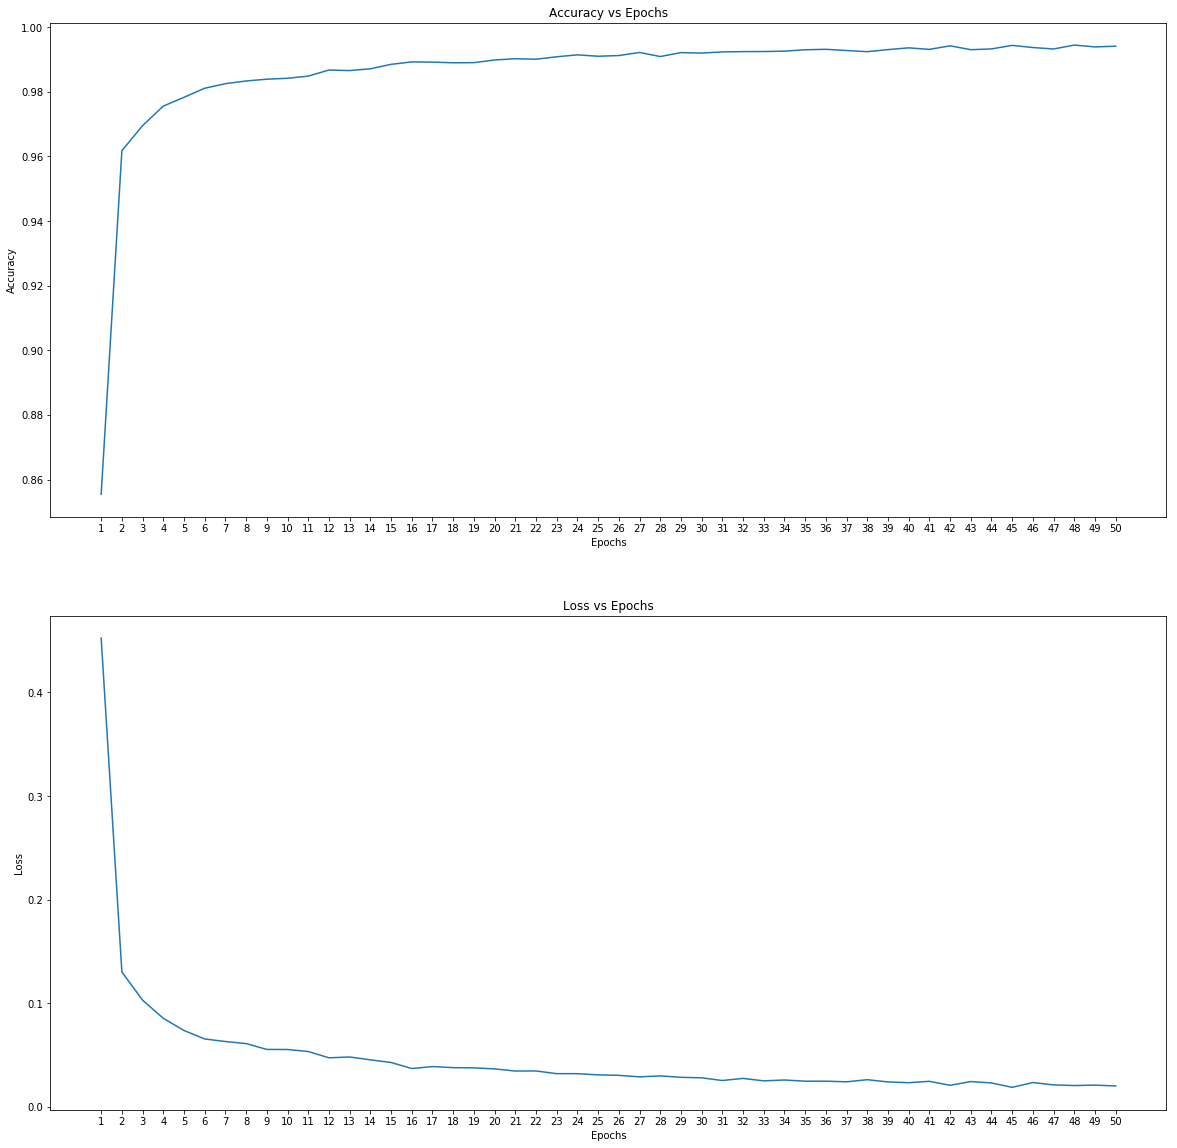

In [13]:
fig,(acc,loss)=plt.subplots(2,1)


acc.set_title('Accuracy vs Epochs')
acc.plot(np.arange(1,len(history.history['acc'])+1),history.history['acc'])
acc.set_xlabel('Epochs')
acc.set_ylabel('Accuracy')
acc.set_xticks(np.arange(1,len(history.history['acc'])+1))

loss.set_title('Loss vs Epochs')
loss.plot(np.arange(1,len(history.history['loss'])+1),history.history['loss'])
loss.set_xlabel('Epochs')
loss.set_ylabel('Loss')
loss.set_xticks(np.arange(1,len(history.history['loss'])+1))

fig.set_figheight(20)
fig.set_figwidth(20)
fig.show()

# Generating predictions for Test set

In [14]:
x_test=test.values.reshape(-1,28,28,1)/255

In [15]:
pred=np.argmax(model.predict(x=x_test),1)

In [16]:
output=np.concatenate((np.arange(1,test.shape[0]+1).reshape(-1,1),pred.reshape(-1,1)),axis=1)

# Creating Submission file

In [17]:
submission=pd.DataFrame(output,columns=['ImageId','Label'])

In [18]:
submission.to_csv('Submission.csv',index=False)

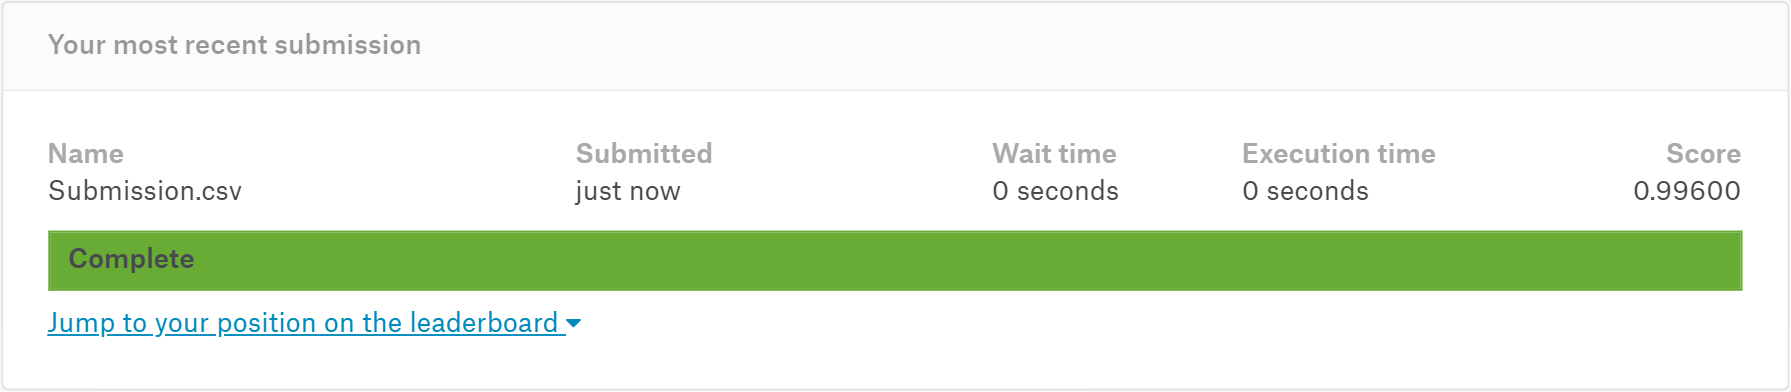